# Introduction

For a well and smooth function of the economy, it is essential to have a well-functioning loan market. It is the market where people can borrow money from financial institutions such as bank. The decision to offer loans is affected by the factors such as income of individual, credit score, and family dependence. Based on these factors, we would build a model that predicts Loan Eligibility for Dream Housing Finance company  based on the details of the clients
## Dataset:
Training data: https://drive.google.com/file/d/1tD02k2zKNUlVr9S-ncr-S_kYQNuSqZFV/view?usp=sharing

Test data : https://drive.google.com/file/d/1LzRJCXm0DzWIp99hP-RgQwrA5kRYdycZ/view?usp=sharing

## Step 1 : loading the dataset

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.simplefilter("ignore")

In [2]:
#Allowing access to the files I have saved on my drive
from google.colab import drive
# using mount method
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/loan_test.csv')
df_train = pd.read_csv('/content/gdrive/MyDrive/Colab Datasets/lon_train.csv')

In [6]:
print("train data has {} features and {} datapoints".format(df_train.shape[1],df_train.shape[0]))
print("test data has {} features and {} datapoints".format(df_test.shape[1],df_test.shape[0]))

train data has 13 features and 614 datapoints
test data has 12 features and 367 datapoints


In [7]:
#use of node interactivity of interactiveshell for having more than one output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [8]:
# look at the info of train and test data
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

There are information about the loan of the clients : we have missing values for some of the columns.

Text(0.5, 1.0, 'Visualization of null values')

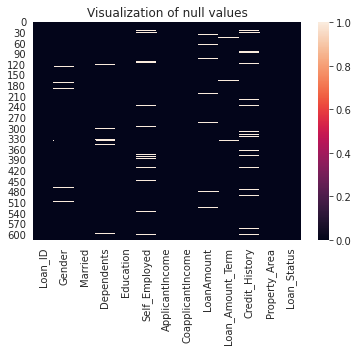

In [9]:
null = df_train.isna()
sns.heatmap(null)
plt.title("Visualization of null values")

In [10]:
round(df_train.isna().sum()*100/len(df_train),1)
round(df_test.isna().sum()*100/len(df_test),1)

Loan_ID              0.0
Gender               2.1
Married              0.5
Dependents           2.4
Education            0.0
Self_Employed        5.2
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           3.6
Loan_Amount_Term     2.3
Credit_History       8.1
Property_Area        0.0
Loan_Status          0.0
dtype: float64

Loan_ID              0.0
Gender               3.0
Married              0.0
Dependents           2.7
Education            0.0
Self_Employed        6.3
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           1.4
Loan_Amount_Term     1.6
Credit_History       7.9
Property_Area        0.0
dtype: float64

There is presence of null values in almost all columns. However, its quantity is very less (less than 5 percent). Maximum null values are present in self-employed and credit history

In [11]:
#looking at the first and last few rows of train set
df_train.head(5)
df_train.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [12]:
#looking at the first and last few rows of test set
df_train.head(5)
df_test.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


# Step 2 : Data Exploration

Data exploration is basically dealt with exploring data to deliver valuable insights about the information. It helps in knowing about different aspects of dataset: correlation, missing values and summary of each feature. So, we will cover this topic in this part.

In [13]:
# describe of features
# object features
df_train.describe(include='object')
# numerical feature
df_train.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Look at some of the facts  from the above :


In [14]:
# Number of unique values : test and train data
# train data
df_train.nunique()
#test data
df_test.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [15]:
# looking at the unique values of each data
for x in  df_train.columns:
    if df_train[x].nunique() <5:
        print("the unique values of {} are {} ".format(x,pd.unique(df_train[x])))

the unique values of Gender are ['Male' 'Female' nan] 
the unique values of Married are ['No' 'Yes' nan] 
the unique values of Dependents are ['0' '1' '2' '3+' nan] 
the unique values of Education are ['Graduate' 'Not Graduate'] 
the unique values of Self_Employed are ['No' 'Yes' nan] 
the unique values of Credit_History are [ 1.  0. nan] 
the unique values of Property_Area are ['Urban' 'Rural' 'Semiurban'] 
the unique values of Loan_Status are ['Y' 'N'] 


In [16]:
# look at the unique values of train data
for x in df_test.columns:
    if df_test[x].nunique()<12:
        print("The unique values of {} are {}".format(x,pd.unique(df_test[x])))

The unique values of Gender are ['Male' 'Female' nan]
The unique values of Married are ['Yes' 'No']
The unique values of Dependents are ['0' '1' '2' '3+' nan]
The unique values of Education are ['Graduate' 'Not Graduate']
The unique values of Self_Employed are ['No' 'Yes' nan]
The unique values of Credit_History are [ 1. nan  0.]
The unique values of Property_Area are ['Urban' 'Semiurban' 'Rural']


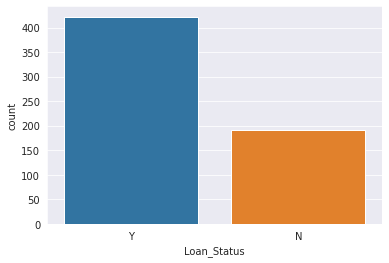

In [17]:
# look at the distribution of loan_status : percentage 
sns.countplot(df_train['Loan_Status'])

From the above, we can see that the individuals who got loans are more than twice of those who were refused it. As a result, we may not learn that well due to unbalanced dataset. let's use resample technique to bring both of them into a balanced situation. The resample uses knn technique to create new samples for the minority class.

Since the data is already low, it would be betterto raise the size of minority class.

In [18]:
# min and majority dataframe
df_min = df_train[df_train['Loan_Status'] =='N']
df_maj  = df_train[df_train['Loan_Status'] =='Y']
# using resample method of utils
from sklearn.utils import resample
# upsample the df_min to the size of majority class
df_min = resample(df_min,n_samples=422)
# concattting them
df_train = pd.concat([df_min,df_maj])

In [19]:
# loan at the loan status now
df_train['Loan_Status'].describe()

count     844
unique      2
top         N
freq      422
Name: Loan_Status, dtype: object

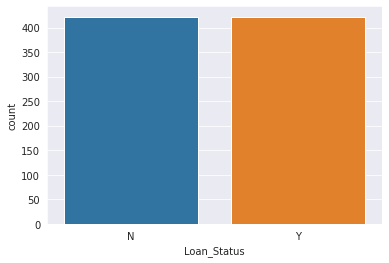

In [20]:
# visualization
sns.countplot(df_train['Loan_Status'])

Now, thanks to upsampling we have equal number of sets for both type of loan_status.

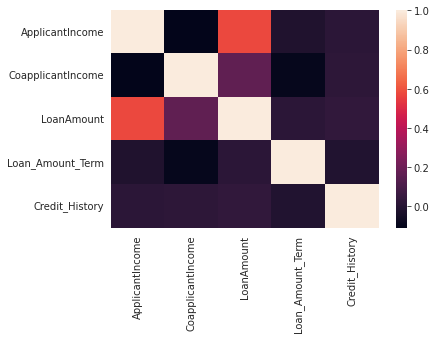

In [21]:
# look at the correlation 
cor = df_train.corr()
sns.heatmap(cor)

In [22]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
459,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


(594, 13)

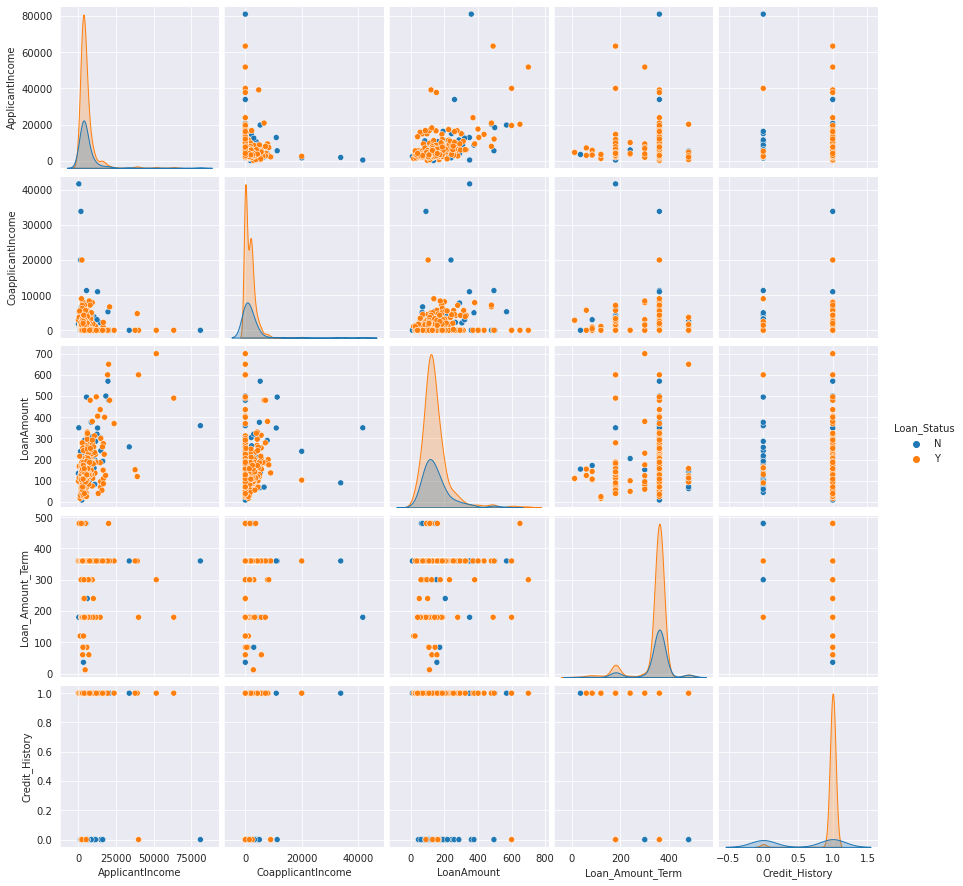

In [23]:
# using unique values
df_unique = df_train[~df_train.index.duplicated()]
# 
df_unique.shape
# pairplot to look at the link between any two numerical variables
sns.pairplot(df_unique,hue='Loan_Status')

Correlation among numerical variables seems to be negligible. At max, there is a postive correlation of 0.57 between applicant income and loan_amount. This is quite obvious as people with higher income tend to apply for higher loan amount.

There appears to lack of correlation between variables.
If you look at the credit history , you will find out that largely people with credit history of 1 are given loans(compared to credit history of 0). Also, there are some other insights as well.

1. People are 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c0a567b90>,
      dtype=object)

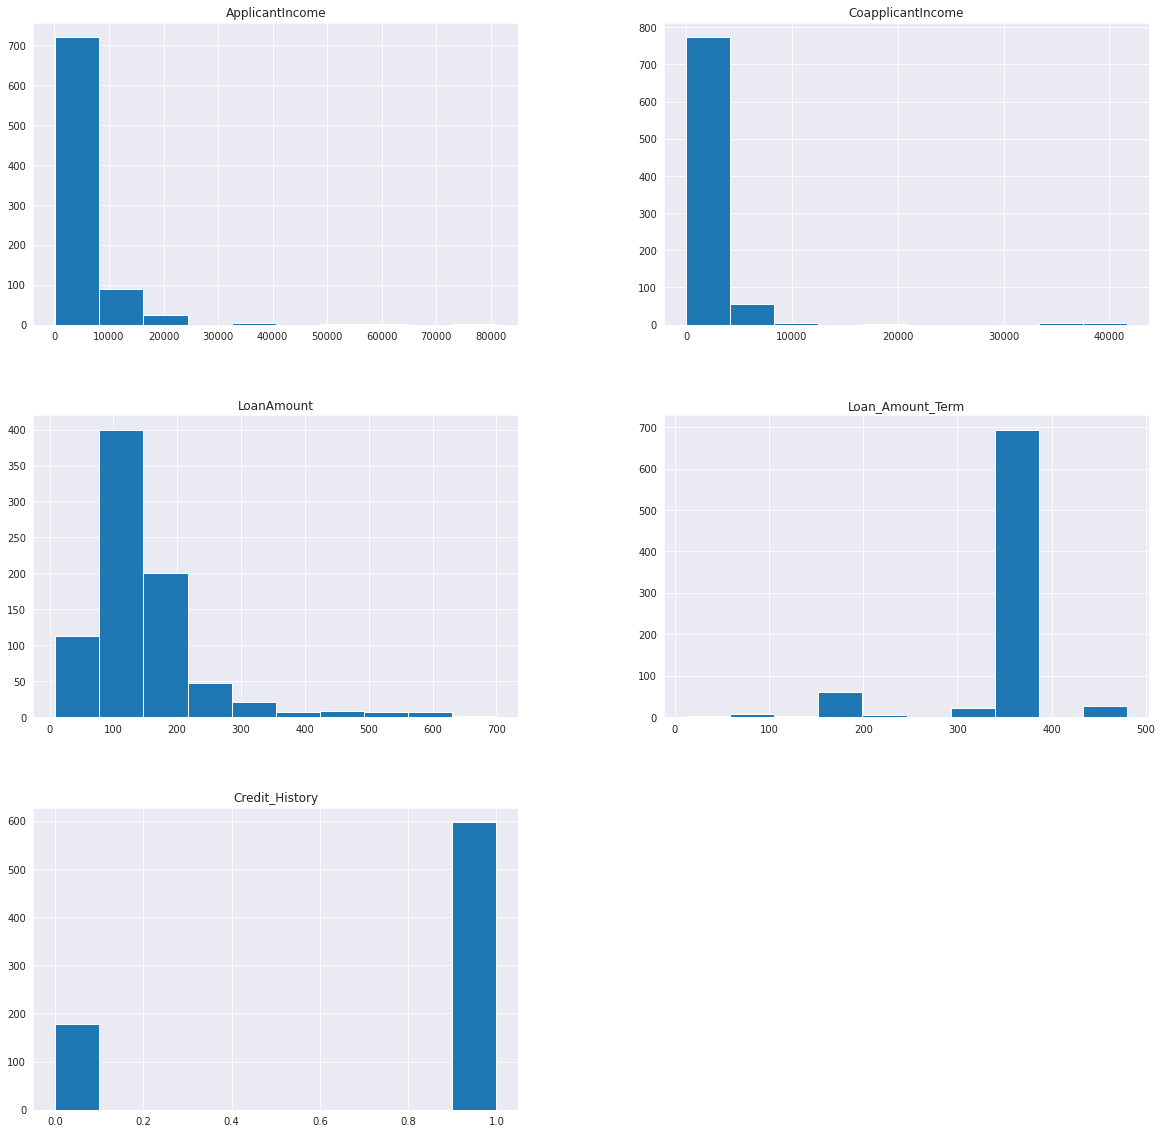

In [24]:
# distribution of loan_amount
#plt.figure(figsize=(40,40))
df_train.hist(figsize=(20,20))

1. Loan_Amount_terms seems to be mostly around 365 days( 1 year).

2. Applicant income lies below 10000 while co-applicant income is around 5000.

3. Credit history of most applicant is 1(good). As a result most of the individuals are getting loans.

# Step 3:  Data Cleaning and data preparation

In this step, we will work on cleaning data and prepare it for modelling purpose. Basically, we would drop or fillna the missing values, convert the non-numerica data into numeric one ( for model) and then, we will split the dataset into train and validation oness.

#### Data Cleaning

Now, we will clean the missing values. Since there are quite less dataset, it won't be wise to rule the missing values out. So, we will fill them with either median or mode value.

In [25]:

df_train.isnull().sum()
df_test.isnull().sum()

Loan_ID               0
Gender               21
Married               3
Dependents           20
Education             0
Self_Employed        45
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           31
Loan_Amount_Term     21
Credit_History       68
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
# train_data
# filling the numerics ones with the median
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(),inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['LoanAmount'].median(),inplace=True)

In [27]:
# train data
#filling the string ones with mode
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

# test data
# filling the string ones with mode
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)



In [28]:
# look at the train and test: there are no null values
df_train.isnull().sum()
#  test data
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

The loan_ID variable lacks relevance in prediction because it is an automated increment variable having no link in decision to loan.

In [29]:
# dropping it from train and test
df_train.drop('Loan_ID',axis=1,inplace=True)

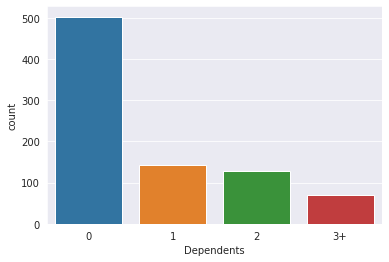

In [30]:
# look at the dependent variable
sns.countplot(df_train['Dependents'])


Dependents variable has 3+ which makes it an object. Since it is a numerical ordinal variable , we will make it 4 for better use

In [31]:
# using replace method to do so
# train data
df_train['Dependents'] = df_train['Dependents'].replace('3+',4)
# for test data
df_test['Dependents'] = df_test['Dependents'].replace('3+',4)


In [32]:
# converting it into numeric : as it is numbers are in string form
df_train['Dependents'] =pd.to_numeric(df_train['Dependents'])
df_test['Dependents'] = pd.to_numeric(df_test['Dependents'])

In [33]:
 # mapping the loan_status variable
df_train['Loan_Status'].map({'Y':1,'N':0})

369    0
581    0
459    0
308    0
30     0
      ..
608    1
609    1
610    1
611    1
612    1
Name: Loan_Status, Length: 844, dtype: int64

In [34]:
 # getting dummies of categorical variables
# train data
df_tr =  pd.get_dummies(df_train,drop_first=True)
# test data
df_te = pd.get_dummies(df_test,drop_first=True)

In [35]:
# look at train data
df_tr.head(5)
# look at test data
df_te.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
369,0,19730,5266.0,570.0,360.0,1.0,1,1,0,0,0,0,0
581,0,1836,33837.0,90.0,360.0,1.0,1,0,0,0,0,1,0
459,0,8334,0.0,160.0,360.0,1.0,1,1,0,0,1,0,0
308,0,20233,0.0,480.0,360.0,1.0,1,0,0,0,0,0,0
30,1,4166,3369.0,201.0,360.0,1.0,1,1,0,0,0,1,0


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Loan_ID_LP002975,Loan_ID_LP002980,Loan_ID_LP002986,Loan_ID_LP002989,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1


In [36]:
# dividing into x and y variable
x= df_tr.drop('Loan_Status_Y',axis=1)
y = df_tr['Loan_Status_Y']
# convert into arrays
x_a  = np.array(x)
y_a = np.array(y)

In [37]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,stratify=y_a,random_state=34,test_size=0.20)

#### Normalize the features
Now, we will normalize the features so that they lie in the same range. This is done with a view to standardize the variables and standardization makes features equally important. Here, we would be using minmaxscaler which will make to convert each feature into (0,1) range.

In [38]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

## Step 3 : Data Modelling

In this step , we will build a simple baseline model which should be good enough to predict loan status. It is a classification problem for which we will make use different classification algorithms and choose the model which works best for us in terms of prediction.


We would be using cross_validation on the train data by which a significant portion of it would be used for testing. Then once we arrive at the best model, we would be using the same on the test data to see how good it works on the test data.

In [39]:
# import all available classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# dictionary of models
models = {'Logistic Regression':LogisticRegression(),'SVC':SVC(),'DecisionTreeClassifier':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier()}
# list of scores from cross val score 
scores_mean = []
scores_var = []
for model in models.values():
    scores_mean.append(np.mean(cross_val_score(model,x_train,y_train,cv=5)))
    scores_var.append(np.std(cross_val_score(model,x_train,y_train,cv=5)))
for i in range(len(models.keys())):
    print("The average accuracy and average variation error of {} are {} and {} respectively".format(list(models.keys())[i],round(scores_mean[i]*100,0),round(scores_var[i]*100,0)))

The average accuracy and average variation error of Logistic Regression are 68.0 and 3.0 respectively
The average accuracy and average variation error of SVC are 52.0 and 7.0 respectively
The average accuracy and average variation error of DecisionTreeClassifier are 83.0 and 2.0 respectively
The average accuracy and average variation error of RandomForestClassifier are 89.0 and 3.0 respectively


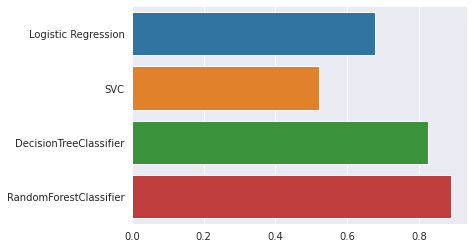

In [40]:
# visualization to see the performance by each model
sns.barplot(x=scores_mean,y=list(models.keys()))

From the above, we can say that the RandomForest is best in terms of prediction. So,we will take this model ahead and look at its performance for the test data.

In [41]:
# initialize both models
model = RandomForestClassifier()
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        84
           1       0.88      0.86      0.87        85

    accuracy                           0.87       169
   macro avg       0.87      0.87      0.87       169
weighted avg       0.87      0.87      0.87       169



In [43]:
# look at score of prediction
print("The accuracy of the Random Forest is {}".format(model.score(x_test,y_test)))

The accuracy of the Random Forest is 0.8698224852071006


We are able to extract a good amount of prediction. This is because model is equally good in predicting for 0 and 1 loan status. In addition, the prediction on test data is even  greater than the prediction received on cross_validation (92 compared to 89). Thus, it looks like this model is not having an overfitting problem and it seems that it has a good learning experience with randomforest model.

## Step 4: Feature Selection and Feature engineering

In this step , we will employ techniques such as feature engineering and hyperparameter to enhance the overall performance of the model.

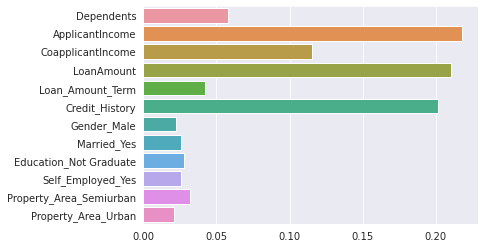

In [44]:
# feature importance : coef_ attribute of the model
sns.barplot(x=np.array(model.feature_importances_).flatten(),y=np.array(x.columns).flatten())

The variables like credit history,income , loan_amount, coapplicant income have good contributions to prediction. Out of all, the credit history seems to playing the major role in determining loan_status.


Now, we will create new features of the given ones. This will basically concerned with creating new featurs from combining two or more or creating discrete variables of continuous variables such as loan amount and income.

In [45]:
# family income which is income divide by number of dependents
x['Family_income'] = round(x['ApplicantIncome'] /(1+x['Dependents']))
# sum of co-applicant income and applicant income
x['total_income']  = x['ApplicantIncome'] + x['CoapplicantIncome']

In [46]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Family_income,total_income
369,0,19730,5266.0,570.0,360.0,1.0,1,1,0,0,0,0,19730.0,24996.0
581,0,1836,33837.0,90.0,360.0,1.0,1,0,0,0,0,1,1836.0,35673.0
459,0,8334,0.0,160.0,360.0,1.0,1,1,0,0,1,0,8334.0,8334.0
308,0,20233,0.0,480.0,360.0,1.0,1,0,0,0,0,0,20233.0,20233.0
30,1,4166,3369.0,201.0,360.0,1.0,1,1,0,0,0,1,2083.0,7535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,3232,1950.0,108.0,360.0,1.0,1,1,0,0,0,0,3232.0,5182.0
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,2900.0,2900.0
610,4,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,821.0,4106.0
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,4036.0,8312.0


In [47]:
# convert into arrays
x_a  = np.array(x)
y_a = np.array(y)


In [48]:
# col is the variable with all columns names
col = df_train.columns[::]
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [49]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=34,test_size=0.20)


In [50]:
# initialize both models
model = RandomForestClassifier()
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        82
           1       0.95      0.91      0.93        87

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



In [52]:
# look at score of prediction
print("The accuracy of the random forest model is {}".format(model.score(x_test,y_test)))

The accuracy of the random forest model is 0.9289940828402367


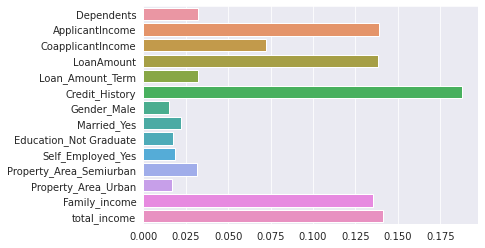

In [53]:
# loook at the feature importances_
sns.barplot(model.feature_importances_,x.columns)

## Hyperparameters

Lets hypertune the parameters of the randomforestmodel and see how it impacts the model prediction and other prediction metrics(such as recall and f1).

In [54]:
### using gridsearch cv for it
from sklearn.model_selection import GridSearchCV
### setting parameters
### max_features: number of max featurs that can be used for each individual tree
### min_samples_split is the min samples required for a split in a tree
### n_estimators are the number of individuals trees to be used
### max_depth is the number of levels (from root to leaf)
para  = {'max_features':['auto','sqrt'],'max_depth':[10,50,100],
                                    'min_samples_split' :[5,10,15],'min_samples_leaf' :[1,2,4],'bootstrap':[True,False]
,'n_estimators':[10,50,100 ]}

### using gridsearch feature
gs = GridSearchCV(param_grid=para,estimator=RandomForestClassifier())
### fitting on x_train and y_train
gs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [55]:
# best parameters
gs.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [56]:
# now fittig the model on this
rf = RandomForestClassifier(bootstrap=False,max_depth =50,max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=50)
# fitting on train data
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=50)

In [57]:
# predict on test
y_pred = rf.predict(x_test)
# using classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        82
           1       0.96      0.90      0.93        87

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



In [58]:
print("The accuracy of the random forest model is {}".format(rf.score(x_test,y_test)))

The accuracy of the random forest model is 0.9289940828402367


The model accuracy has increased to 93 percent. More importantly , this accuracy is quite same throughout all classes.

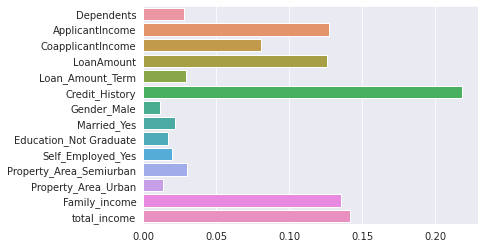

In [59]:
# look at the  model importance 
sns.barplot(np.array(rf.feature_importances_).flatten(),x.columns)

From the above, one can see that not all features are contributing to the model performance ,so we may remove some less important features and then look at the model performance afterwards.

Before that we shall convert the above continous variables into discrete ones to see how it changes prediction.
We will use [cut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) method to do this as it is based on quartiles and will allow the equal number of elements in each bin.



In [60]:
# implementing qcut method of pandas
x['Applicant_Income_order']  = pd.cut(x['ApplicantIncome'],bins=4,labels =[1,2,3,4] )
x['CoapplicantIncome_order'] = pd.cut(x['CoapplicantIncome'],bins=4,labels =[1,2,3,4],duplicates ='drop' )
x['Loan_Amount_order'] = pd.cut(x['LoanAmount'],bins=4,labels =[1,2,3,4] )
x['Loan_term_order'] = pd.cut(x['Loan_Amount_Term'],bins=4,labels =[1,2,3,4] )
x['Family_Income_order']  = pd.cut(x['Family_income'],bins=4,labels =[1,2,3,4] )
x['total_income_order'] = pd.cut(x['total_income'],bins=4,labels =[1,2,3,4] )

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=50)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        82
           1       0.95      0.92      0.94        87

    accuracy                           0.93       169
   macro avg       0.94      0.94      0.93       169
weighted avg       0.94      0.93      0.93       169



The accuracy of the random forest model is 0.9349112426035503


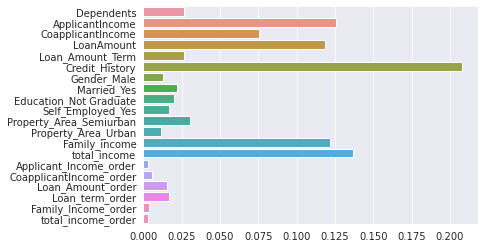

In [61]:
# convert into arrays
x_a  = np.array(x)
y_a = np.array(y)


# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=34,test_size=0.20)



# initialize both models
model = RandomForestClassifier(bootstrap=False,max_depth =50,max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=50)
# fitting or learning with train data
model.fit(x_train,y_train)




# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))


# loook at the feature importances_
sns.barplot(model.feature_importances_,x.columns)


# look at score of prediction
print("The accuracy of the random forest model is {}".format(model.score(x_test,y_test)))

It sees that the model has got worsen with the inclusion of new created variables of order. So, we would remove them 

Lets remove some features  which has no contribution to the model prediction:

These are dependents , gender_male,married_yes, education_not , self_employed_yes, property_Area_semiurban, property_area_urban as welll.



In [62]:
# creating x_fil for this
x_fil = x.drop(['Dependents','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes',
               'Property_Area_Urban','Property_Area_Semiurban','Applicant_Income_order','CoapplicantIncome_order','Loan_Amount_order'
              ,'Family_Income_order','total_income_order' ],axis=1)
x_fil = x_fil.drop('Loan_Amount_Term',axis=1)

In [63]:
# creating arrays
# convert into arrays
x_a  = np.array(x_fil)
y_a = np.array(y)

In [64]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# initializing it
mm = MinMaxScaler()
# transform both x_a 
x_a = mm.fit_transform(x_a)

In [65]:
# Splitting the data set:
# Now we will split the dataset into train and test data: 
# using train_test_split of model selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=34,test_size=0.20)

In [66]:
# initialize both models
model = RandomForestClassifier(bootstrap=False,max_depth =50,max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=50)
# fitting or learning with train data
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=50)

In [67]:
# predict on test data
y_pred = model.predict(x_test)
# look at the clasficiation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        82
           1       0.92      0.90      0.91        87

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



In [68]:
# look at score of prediction
print("The accuracy of the random forest model is {}".format(model.score(x_test,y_test)))

The accuracy of the random forest model is 0.9053254437869822


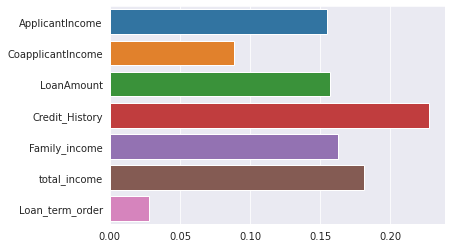

In [69]:
# feature importance
sns.barplot(np.array(model.feature_importances_).flatten(),np.array(x_fil.columns).flatten())

In [70]:
# look at the x_fil
x_fil

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Family_income,total_income,Loan_term_order
369,19730,5266.0,570.0,1.0,19730.0,24996.0,3
581,1836,33837.0,90.0,1.0,1836.0,35673.0,3
459,8334,0.0,160.0,1.0,8334.0,8334.0,3
308,20233,0.0,480.0,1.0,20233.0,20233.0,3
30,4166,3369.0,201.0,1.0,2083.0,7535.0,3
...,...,...,...,...,...,...,...
608,3232,1950.0,108.0,1.0,3232.0,5182.0,3
609,2900,0.0,71.0,1.0,2900.0,2900.0,3
610,4106,0.0,40.0,1.0,821.0,4106.0,2
611,8072,240.0,253.0,1.0,4036.0,8312.0,3


# Working on test data

Now, we will explore and clean test data so that it matches the requirements of the model we have just created.

In [71]:
# look at the tets data
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Based on the features used in the above model, we would adjust the dataframe  of test data.


In [72]:
# checking for null
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [73]:
# filling the null with median
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())
df_test['Loan_Amount_Term'] =df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())

In [74]:
# getting the new featurs
df_test['Family_Income'] = round(df_test['ApplicantIncome'] /(1+df_test['Dependents']),0)
df_test['total_income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['Loan_term_order'] = pd.cut(df_test['Loan_Amount_Term'],labels =[1,2,3,4],bins=4)

In [75]:
# removing the features not needed
df_test_fil = df_test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Amount_Term','Loan_ID'],axis=1)

In [76]:
print(df_test_fil.columns)
# getting 

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Family_Income', 'total_income', 'Loan_term_order'],
      dtype='object')


In [77]:
# using minmax scaler  which was initialized as mm earliers
x_unseen = mm.fit_transform(df_test_fil)

In [78]:
# using the previous model  to predict
y_unseen_pred = model.predict(x_unseen)

In [79]:
# look at the prediction of unseen dataset
y_unseen_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [80]:
# making a data frame containing both loan_id and prediction
df_test_pred = pd.DataFrame()

In [81]:
#  loan id  and predicted values
df_test_pred['Loan_ID'] = df_test['Loan_ID']
df_test_pred['prediction'] = y_unseen_pred


In [82]:
# look at the prediction
df_test_pred

,Loan_ID,prediction
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,0


# Saving the Model

In this step, we will save the model with the help of joblib library so that it can be used for future needs.

In [83]:
# saving as csv C:\Users\risgupta\Downloads
df_test_pred.to_csv(r'C:\Users\risgupta\Desktop\test_prediction.csv',index=False)
#df_test_pred.to_csv('prediction_test.csv')
#df_test_pred

In [84]:
# saing the model
import joblib
# dumping model
joblib.dump(model,filename='loan_prediction__m.sav')

['loan_prediction__m.sav']

In [85]:
#loading the model
model_df = joblib.load('loan_prediction__m.sav')


In [86]:
# making prediction based on the model
y_pred = model_df.predict(x_test)
# look at the predicted output
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=uint8)

# Conclusion


In this notebook, we dealt with the problem of predicting whether an individual will get loan or not based on the attributes such as income, family size, and loan amount.


To deal with this problem, we started out with exploring and cleaning the dataset to make it desirable for modelling. 

Then we create a series of models. Based on the prediction result, we choosen random forest model for the loan prediction. After hypertuning the parameters, we were able to achive a prediction power of 92 percent across all classes.